In [15]:
import math
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import distance
from pykrige.ok import OrdinaryKriging
###pip install Distance
###pip install pykrige

In [16]:
def distance(point1, point2):
	return math.sqrt((point2[0]-point1[0])*(point2[0]-point1[0])+(point2[1]-point1[1])*(point2[1]-point1[1]))

Import data

In [17]:
points_list = []
with open('samples.xyz') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  header = next(reader)
  for line in reader:
    p = list(map(float, line))
    points_list.append(p)

In [18]:
# supprime données doublons
clean_points_list = []
for point1 in points_list:
	repeated = False
	for point2 in clean_points_list:
		if point1[0] == point2[0] and point1[1] == point2[1]:
			repeated = True
	if repeated == False:
		clean_points_list.append(point1)
	else:
		print("Repeated point: " + str(point1[0]) + " " + str(point1[1]))
points = np.array(clean_points_list)


Repeated point: 145.0 232.0
Repeated point: 59.0 243.0
Repeated point: 171.0 50.0
Repeated point: 8.0 135.0
Repeated point: 109.0 61.0
Repeated point: 25.0 105.0
Repeated point: 155.0 203.0
Repeated point: 93.0 46.0
Repeated point: 32.0 252.0
Repeated point: 136.0 117.0


In [19]:
points
new=[6,244,78.97872]

## Plot dataset

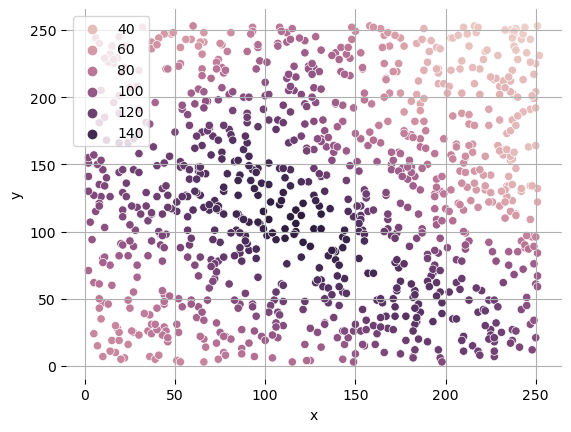

In [21]:
dataplot = sns.scatterplot(x=points[:,0], y=points[:,1], hue=points[:,2],cmap="plasma")
sns.despine(left=True,bottom=True)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Fonction Variogram

In [14]:
variogram_points_list = []
max_distance = 0.0
use_probability = 1.0
for point1 in points:
	for point2 in points:
		if random.random() >= use_probability:
			continue
		h = distance(point1, point2)
		if h > max_distance:
			max_distance = h
		variogram_points_list.append([h, 0.5*(point2[2]-point1[2])*(point2[2]-point1[2])]) ### création liste [ distance,variogram]
variogram_points = np.array(variogram_points_list)

TypeError: 'module' object is not callable

In [24]:
print(variogram_points)
len(variogram_points) ## 980*980

[[  0.           0.        ]
 [234.00213674  35.94434642]
 [324.05246489 937.81438538]
 ...
 [165.52945357 456.63900792]
 [162.69296236 159.70437072]
 [  0.           0.        ]]


960400

In [158]:
mat=[]
for i in range(len(variogram_points)):
    mat.append(variogram_points[i][0])

mat=np.reshape(mat, (980, 980))
mat

ValueError: cannot reshape array of size 36 into shape (980,980)

In [20]:
variogram_points_list = []
max_distance = 0.0
use_probability = 1.0
for point2 in points:
	if random.random() >= use_probability:
		continue
	h = distance(new, point2)
	if h > max_distance:
		max_distance = h
	variogram_points_list.append([h, 0.5*(point2[2]-new[2])*(point2[2]-new[2])]) ### création liste [ distance,variogram]
variogram_points_new = np.array(variogram_points_list)

In [21]:
vect_new=[]
for i in range(len(variogram_points_new)):
    vect_new.append(variogram_points_new[i][0])
del vect_new[0]
vect_new

[234.00213674238105,
 324.05246488801777,
 114.72575996697516,
 280.2320467041555,
 234.54637068179076,
 145.7737973711325,
 272.28110474287416,
 178.04493814764857,
 254.678228358845,
 100.22474744293447,
 179.62739212046696,
 223.4323163734378,
 139.05754204644924,
 201.89601283829256,
 110.11357772772621,
 162.5207679036744,
 126.53062870309307,
 175.025712396779,
 307.19700519373555,
 90.27181176868004,
 240.63457773146402,
 203.3051893090779,
 177.1016657177453,
 216.2706637526227,
 146.7310464761974,
 171.10523077919038,
 210.58252539087852,
 207.06037766796427,
 219.10727965998757,
 219.92044015961773,
 242.1672975444868,
 166.9281282468596,
 161.1241757155021,
 220.00227271553356,
 264.50330810785715,
 73.66138744281159,
 189.02909828912584,
 240.8318915758459,
 119.85407794480753,
 145.83552379307312,
 42.1070065428546,
 251.17722826721374,
 50.695167422546305,
 130.64838307457157,
 142.87407042567241,
 322.4686031228467,
 239.25300416086733,
 91.96738552334735,
 216.333076527

plot du Variogram_test

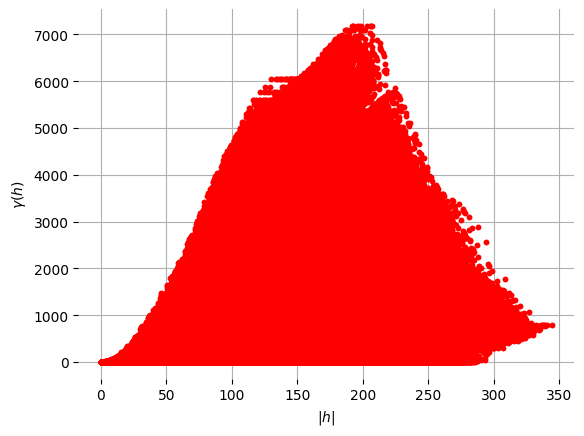

In [25]:
plt.figure(2)
plt.plot(variogram_points[:,0], variogram_points[:,1], 'r.')
sns.despine(left=True,bottom=True)
plt.xlabel('$|h|$')
plt.ylabel('$\gamma(h)$')
plt.grid()
plt.show()

Variogram experimentale

In [30]:
experimental_variogram_bins = []
experimental_variogram_count = []
experimental_variogram_sum = []
bins = 100
half_distance = max_distance/1.0  ### changer la fenêtre de graph
for i in range(bins):
	experimental_variogram_bins.append(half_distance*(i+0.5)/bins)
	experimental_variogram_sum.append(0.0)
	experimental_variogram_count.append(0)


for point in variogram_points:
	correct_bin = math.floor(bins*point[0]/half_distance)
	if correct_bin < bins:
		experimental_variogram_sum[correct_bin] += point[1]
		experimental_variogram_count[correct_bin] += 1


experimental_variogram_average = []
for i in range(bins):
	if experimental_variogram_count[i] > 0.0:
		experimental_variogram_average.append(experimental_variogram_sum[i]/experimental_variogram_count[i])
	else:
		experimental_variogram_average.append(0.0)

Variogram Theorique

In [31]:

theoretical_variogram_exponential = []
theoretical_variogram_gaussian = []
theoretical_variogram_spherical = []
exponential_style = []
gaussian_style = []
spherical_style = []
sill_exponential = 1350  ##à ajuster suivant taille des exp_var_average
sill_gaussian = 1310
sill_spherical = 1350
range_exponential = 250
range_gaussian = 280
range_spherical = 280
nugget_exponential = 10
nugget_gaussian = 1
nugget_spherical = 10
for bin in experimental_variogram_bins:
	theoretical_variogram_exponential.append(nugget_exponential+sill_exponential*(1.0 - math.exp(-3.0*bin/range_exponential)))
	theoretical_variogram_gaussian.append(nugget_gaussian+sill_gaussian*(1.0 - math.exp(-9.0*bin*bin/(range_gaussian*range_gaussian))))
	exponential_style.append('exponential')
	gaussian_style.append('gaussian')
	spherical_style.append('spherical')
	if bin <= range_spherical:
		theoretical_variogram_spherical.append(nugget_spherical+sill_spherical*(((3.0*bin)/(2.0*range_spherical))-((bin*bin*bin)/(2.0*range_spherical*range_spherical*range_spherical))))
	else:
		theoretical_variogram_spherical.append(nugget_spherical+sill_spherical)


Graph des différents variogram

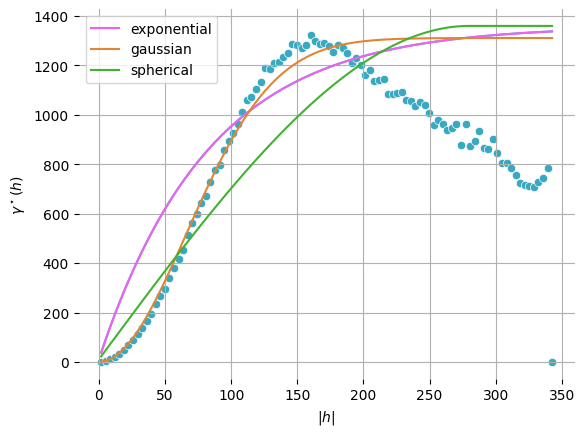

In [32]:
plt.figure(3)
sns.set_palette(sns.husl_palette(4, h=0.6))
sns.scatterplot(x=experimental_variogram_bins, y=experimental_variogram_average)
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_exponential)
sns.set_palette(sns.husl_palette(4, h=0.85))
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_exponential, hue=exponential_style)
sns.set_palette(sns.husl_palette(4, h=0.1))
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_gaussian, hue=gaussian_style)
sns.set_palette(sns.husl_palette(4, h=0.35))
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_spherical, hue=spherical_style)
sns.despine(left=True,bottom=True)
plt.xlabel('$|h|$')
plt.ylabel('$\gamma^\star(h)$')
plt.grid()
plt.show()

In [169]:
len(theoretical_variogram_gaussian)
points.shape
len(experimental_variogram_bins)
len(theoretical_variogram_exponential)

AttributeError: 'list' object has no attribute 'shape'

300

Calcul Variogram via packages

In [170]:
OK = OrdinaryKriging(
    points[:,0], 
    points[:,1], 
    points[:,2], 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=20,
)
OK.variogram_model_parameters

TypeError: list indices must be integers or slices, not tuple

In [30]:
gridx = np.arange(0, 250, 10, dtype='float64')  
gridy = np.arange(0, 250, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy) 

Executing Ordinary Kriging...



MAPPING

Text(0.5, 1.0, 'Porosity estimate')

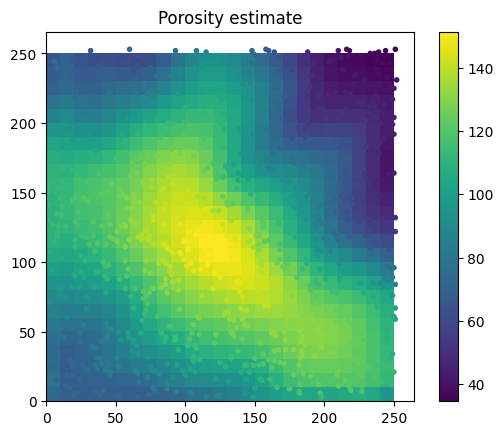

In [31]:
cax = plt.imshow(zstar, extent=(0, 250, 0, 250), origin='lower')
plt.scatter(points[:,0], points[:,1], c=points[:,2], marker='.') 
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

C:\Users\vince\AppData\Local\Temp\ipykernel_13752\3924798467.py:1: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent=(0, 250, 0, 250), origin='lower') ## on retrouve le variogramme précèdent


Text(0.5, 1.0, 'Porosity standard devation')

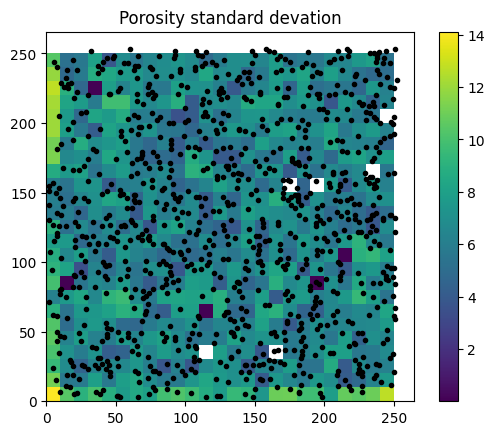

In [113]:
cax = plt.imshow(np.sqrt(ss), extent=(0, 250, 0, 250), origin='lower') ## on retrouve le variogramme précèdent
plt.scatter(points[:,0], points[:,1], c='k', marker='.') 
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')  ### Ecart-type identique dans tout le mapping